<a href="https://colab.research.google.com/github/praveenkr0017/Tropospherical-Ozone-Prediction/blob/main/BTP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/CAMS+ERA5_Total_Final_Combined_Data_Banda.csv')
#df = pd.read_csv('/content/combined__.csv')

In [ ]:
df.head()

,longitude,latitude,time,co,no2,hcho,no,so2,go3,pressure_level,number,expver,u,v,r,t,blh
0,80.25,25.35,1/2/2003 0:00,9.770000e-07,1.090000e-08,2.550000e-09,3.560000e-10,5.620000e-09,2.250000e-08,1000,0,1,0.437677,0.473905,86.93266,285.11010,37.72780
1,80.25,25.35,1/2/2003 3:00,8.850000e-07,5.560000e-09,2.810000e-09,7.210000e-10,3.120000e-09,4.170000e-08,1000,0,1,-1.183033,0.422198,75.06712,285.77612,790.59570
2,80.25,25.35,1/2/2003 6:00,5.290000e-07,7.370000e-10,1.830000e-09,1.200000e-10,8.700000e-10,7.570000e-08,1000,0,1,-2.180543,1.399578,64.30040,287.37817,1019.94920
3,80.25,25.35,1/2/2003 9:00,4.860000e-07,7.610000e-10,1.560000e-09,1.190000e-10,1.160000e-09,8.220000e-08,1000,0,1,-1.968803,0.046848,57.85016,289.48120,1124.46970
4,80.25,25.35,1/2/2003 12:00,5.410000e-07,2.370000e-09,1.630000e-09,1.750000e-11,2.110000e-09,6.750000e-08,1000,0,1,-2.039933,-1.509186,61.89409,288.94360,277.26074


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   longitude       43824 non-null  float64
 1   latitude        43824 non-null  float64
 2   time            43824 non-null  object 
 3   co              43824 non-null  float64
 4   no2             43824 non-null  float64
 5   hcho            43824 non-null  float64
 6   no              43824 non-null  float64
 7   so2             43824 non-null  float64
 8   go3             43824 non-null  float64
 9   pressure_level  43824 non-null  int64  
 10  number          43824 non-null  int64  
 11  expver          43824 non-null  int64  
 12  u               43824 non-null  float64
 13  v               43824 non-null  float64
 14  r               43824 non-null  float64
 15  t               43824 non-null  float64
 16  blh             43824 non-null  float64
dtypes: float64(13), int64(3), objec

In [ ]:
df.shape

(43824, 17)

In [ ]:
df.describe()

,longitude,latitude,co,no2,hcho,no,so2,go3,pressure_level,number,expver,u,v,r,t,blh
count,43824.00,4.382400e+04,4.382400e+04,4.382400e+04,4.382400e+04,4.382400e+04,4.382400e+04,4.382400e+04,43824.0,43824.0,43824.0,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,80.25,2.535000e+01,5.562349e-07,1.286303e-08,3.266812e-09,1.393271e-09,7.123028e-09,5.751217e-08,1000.0,0.0,1.0,0.507959,-0.235603,57.038031,301.080334,573.746660
std,0.00,1.028522e-11,4.220594e-07,1.289554e-08,1.715605e-09,3.843911e-09,5.636454e-09,3.870685e-08,0.0,0.0,0.0,2.017633,1.467451,23.452537,6.770186,807.860647
min,80.25,2.535000e+01,9.310000e-08,1.000000e-14,7.890000e-10,0.000000e+00,0.000000e+00,1.000000e-14,1000.0,0.0,1.0,-8.962476,-6.770963,5.509416,277.615480,10.401449
25%,80.25,2.535000e+01,2.300000e-07,2.930000e-09,2.130000e-09,1.060000e-10,2.650000e-09,2.760000e-08,1000.0,0.0,1.0,-0.935588,-1.315110,37.834091,296.712218,59.813095
50%,80.25,2.535000e+01,4.170000e-07,9.290000e-09,2.850000e-09,1.940000e-10,5.430000e-09,5.020000e-08,1000.0,0.0,1.0,0.668269,-0.257749,58.855232,301.634770,204.993750
75%,80.25,2.535000e+01,7.700000e-07,1.910000e-08,3.870000e-09,6.840000e-10,1.020000e-08,8.620000e-08,1000.0,0.0,1.0,1.947503,0.810987,76.631568,305.405392,789.274965
max,80.25,2.535000e+01,2.900000e-06,2.700000e-07,2.180000e-08,5.460000e-08,3.530000e-08,2.150000e-07,1000.0,0.0,1.0,7.529867,8.421390,100.712050,318.412100,5090.277300


In [ ]:
df.isnull()

,longitude,latitude,time,co,no2,hcho,no,so2,go3,pressure_level,number,expver,u,v,r,t,blh
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
43820,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
43821,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
43822,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
time,0
co,0
no2,0
hcho,0
no,0
so2,0
go3,0
pressure_level,0


In [ ]:
df1 = df.drop(['longitude','latitude','pressure_level','number','expver'],axis=1) #Dropping redundant columns (features)

In [ ]:
print(df.columns)

Index(['longitude', 'latitude', 'time', 'co', 'no2', 'hcho', 'no', 'so2',
       'go3', 'pressure_level', 'number', 'expver', 'u', 'v', 'r', 't', 'blh'],
      dtype='object')


In [ ]:
df1

,time,co,no2,hcho,no,so2,go3,u,v,r,t,blh
0,1/2/2003 0:00,9.770000e-07,1.090000e-08,2.550000e-09,3.560000e-10,5.620000e-09,2.250000e-08,0.437677,0.473905,86.932660,285.11010,37.727800
1,1/2/2003 3:00,8.850000e-07,5.560000e-09,2.810000e-09,7.210000e-10,3.120000e-09,4.170000e-08,-1.183033,0.422198,75.067120,285.77612,790.595700
2,1/2/2003 6:00,5.290000e-07,7.370000e-10,1.830000e-09,1.200000e-10,8.700000e-10,7.570000e-08,-2.180543,1.399578,64.300400,287.37817,1019.949200
3,1/2/2003 9:00,4.860000e-07,7.610000e-10,1.560000e-09,1.190000e-10,1.160000e-09,8.220000e-08,-1.968803,0.046848,57.850160,289.48120,1124.469700
4,1/2/2003 12:00,5.410000e-07,2.370000e-09,1.630000e-09,1.750000e-11,2.110000e-09,6.750000e-08,-2.039933,-1.509186,61.894090,288.94360,277.260740
...,...,...,...,...,...,...,...,...,...,...,...,...
43819,12/31/2017 9:00,1.110000e-06,4.780000e-09,2.860000e-09,2.570000e-10,1.930000e-09,1.310000e-07,-0.349399,-1.497217,51.721817,293.71973,869.097900
43820,12/31/2017 12:00,1.270000e-06,9.360000e-09,2.880000e-09,7.580000e-11,5.730000e-09,7.490000e-08,-1.137336,-1.923453,61.972214,293.12598,91.926160
43821,12/31/2017 15:00,1.850000e-06,2.590000e-08,3.240000e-09,4.560000e-10,1.400000e-08,2.000000e-08,-1.372306,-1.545503,79.302610,290.66504,47.471542
43822,12/31/2017 18:00,2.270000e-06,3.950000e-08,4.050000e-09,8.900000e-10,2.110000e-08,1.080000e-08,-0.507361,-0.471777,86.326200,289.36280,17.858460


Now Re-ordering the column go3 (tropospherical ozone) to the last position for personal comfort

In [ ]:
cols = list(df1.columns)
cols.append(cols.pop(cols.index('go3')))
df2 = df1[cols]

In [ ]:
df2

,time,co,no2,hcho,no,so2,u,v,r,t,blh,go3
0,1/2/2003 0:00,9.770000e-07,1.090000e-08,2.550000e-09,3.560000e-10,5.620000e-09,0.437677,0.473905,86.932660,285.11010,37.727800,2.250000e-08
1,1/2/2003 3:00,8.850000e-07,5.560000e-09,2.810000e-09,7.210000e-10,3.120000e-09,-1.183033,0.422198,75.067120,285.77612,790.595700,4.170000e-08
2,1/2/2003 6:00,5.290000e-07,7.370000e-10,1.830000e-09,1.200000e-10,8.700000e-10,-2.180543,1.399578,64.300400,287.37817,1019.949200,7.570000e-08
3,1/2/2003 9:00,4.860000e-07,7.610000e-10,1.560000e-09,1.190000e-10,1.160000e-09,-1.968803,0.046848,57.850160,289.48120,1124.469700,8.220000e-08
4,1/2/2003 12:00,5.410000e-07,2.370000e-09,1.630000e-09,1.750000e-11,2.110000e-09,-2.039933,-1.509186,61.894090,288.94360,277.260740,6.750000e-08
...,...,...,...,...,...,...,...,...,...,...,...,...
43819,12/31/2017 9:00,1.110000e-06,4.780000e-09,2.860000e-09,2.570000e-10,1.930000e-09,-0.349399,-1.497217,51.721817,293.71973,869.097900,1.310000e-07
43820,12/31/2017 12:00,1.270000e-06,9.360000e-09,2.880000e-09,7.580000e-11,5.730000e-09,-1.137336,-1.923453,61.972214,293.12598,91.926160,7.490000e-08
43821,12/31/2017 15:00,1.850000e-06,2.590000e-08,3.240000e-09,4.560000e-10,1.400000e-08,-1.372306,-1.545503,79.302610,290.66504,47.471542,2.000000e-08
43822,12/31/2017 18:00,2.270000e-06,3.950000e-08,4.050000e-09,8.900000e-10,2.110000e-08,-0.507361,-0.471777,86.326200,289.36280,17.858460,1.080000e-08


Now , Here we have 8 data points for every day i.e. 8 data points in 3 hourly interval , now converting this data to daily average data for every day.

In [ ]:
df2['datetime'] = pd.to_datetime(df2.iloc[:,0])  #Coverting the existing column 'time' data into pandas readable datetime format
df2['date'] = df2['datetime'].dt.date   #Extracting only the date

<ipython-input-214-9bb9a011808b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['datetime'] = pd.to_datetime(df2.iloc[:,0])  #Coverting the existing column 'time' data into pandas readable datetime format
<ipython-input-214-9bb9a011808b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = df2['datetime'].dt.date   #Extracting only the date


In [ ]:
df2['date']

,date
0,2003-01-02
1,2003-01-02
2,2003-01-02
3,2003-01-02
4,2003-01-02
...,...
43819,2017-12-31
43820,2017-12-31
43821,2017-12-31
43822,2017-12-31


In [ ]:
co_col = df2.columns[1]
no2_col = df2.columns[2]
hcho_col = df2.columns[3]
no_col = df2.columns[4]
so2_col = df2.columns[5]
u_col = df2.columns[6]
v_col = df2.columns[7]
r_col =df2.columns[8]
t_col = df2.columns[9]
blh_col = df2.columns[10]
o3_col = df2.columns[11]

In [ ]:
df3 = df2.groupby('date').agg({
    co_col: 'mean',  # Average of 'co'
    no2_col: 'mean',  # Average of 'no2'
    hcho_col: 'mean', # Average of 'hcho'
    no_col: 'mean',  # Average of 'no'
    so2_col: 'mean',  # Average of 'no2'
    u_col: 'mean',  # Average of 'u'
    v_col: 'mean',  # Average of 'v'
    r_col: 'mean',  # Average of 'r'
    t_col: 'mean',  # Average of 't'
    blh_col: 'mean',  # Average of 'blh'
    o3_col: 'mean',  # Average of 'o3'
}).reset_index()

In [ ]:
df3

,date,co,no2,hcho,no,so2,u,v,r,t,blh,go3
0,2003-01-02,7.402500e-07,5.191000e-09,2.226250e-09,1.748125e-10,3.970000e-09,-1.898618,-0.304611,71.264304,286.796873,430.097927,5.496250e-08
1,2003-01-03,9.008750e-07,6.485625e-09,2.913750e-09,3.588125e-10,6.491250e-09,0.469245,-1.804741,75.071473,286.960452,269.409405,6.398750e-08
2,2003-01-04,7.522500e-07,5.176250e-09,2.098750e-09,1.651625e-10,5.178750e-09,2.647894,-1.226829,74.068304,286.112428,359.103796,6.223750e-08
3,2003-01-05,8.117500e-07,5.164875e-09,2.182500e-09,3.451375e-10,4.932500e-09,1.054762,-0.083210,74.035942,285.816466,252.040761,6.532500e-08
4,2003-01-06,8.548750e-07,5.434250e-09,2.341250e-09,7.319875e-10,3.966250e-09,-1.163326,-0.203859,81.577966,284.944824,193.752882,6.977500e-08
...,...,...,...,...,...,...,...,...,...,...,...,...
5473,2017-12-27,1.259500e-06,2.227750e-08,3.448750e-09,4.469750e-09,1.376500e-08,0.666197,-0.271301,62.117762,292.366456,240.524968,3.968100e-08
5474,2017-12-28,1.677250e-06,2.816250e-08,4.176250e-09,2.679250e-09,1.659125e-08,-0.121147,-0.396058,65.571665,292.101044,227.906880,4.797500e-08
5475,2017-12-29,1.814250e-06,2.589750e-08,4.217500e-09,1.503388e-09,1.231750e-08,-1.061642,0.065850,69.292657,291.957276,238.063698,6.167000e-08
5476,2017-12-30,1.846250e-06,1.799250e-08,4.082500e-09,1.343200e-09,9.324000e-09,-0.779244,-0.749657,75.312341,291.198365,215.496743,5.252750e-08


In [ ]:
df3.shape

(5478, 12)

43824/8 = 5478 So we converted the data into daily averages data

Below cell's code is to convert the df3 dataframe to csv file and download this daily avarage dataset. (So run the code whenever csv file is to be downloaded)

In [ ]:
# df3.to_csv('Daily_Average_Dataset_for_Banda.csv',index = False)
# from google.colab import files
# files.download('Daily_Average_Dataset_for_Banda.csv')

**Visualization**

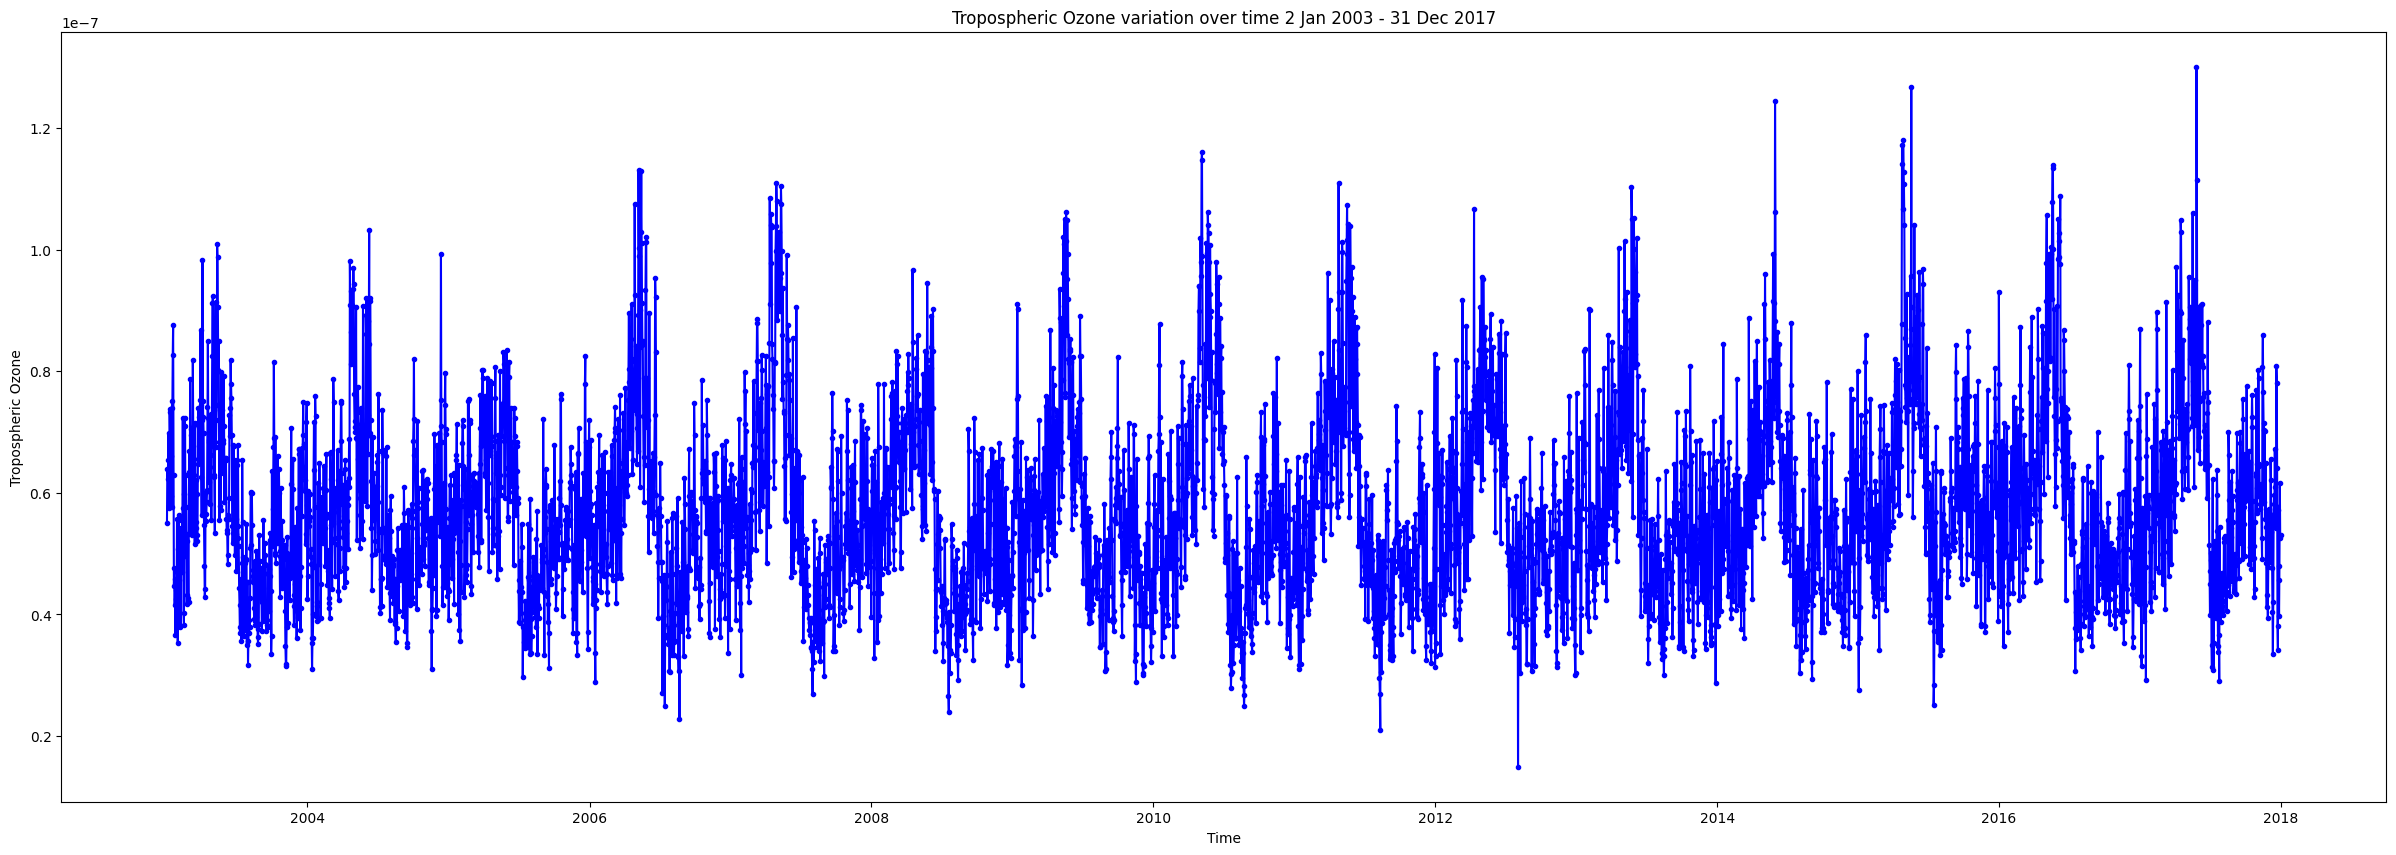

In [ ]:
import matplotlib.pyplot as plt

#Setting the size of the grapgh
plt.figure(figsize=(30,10))

#Plotting the graph
plt.plot(df3['date'],df3['go3'],marker = '.',linestyle='-',color='b',label='Tropospherical Ozone')

#Adding the labels
plt.xlabel('Time')
plt.ylabel('Tropospheric Ozone')
plt.title('Tropospheric Ozone variation over time 2 Jan 2003 - 31 Dec 2017')


#Show the plot
plt.show()


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5478 entries, 0 to 5477
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    5478 non-null   object 
 1   co      5478 non-null   float64
 2   no2     5478 non-null   float64
 3   hcho    5478 non-null   float64
 4   no      5478 non-null   float64
 5   so2     5478 non-null   float64
 6   u       5478 non-null   float64
 7   v       5478 non-null   float64
 8   r       5478 non-null   float64
 9   t       5478 non-null   float64
 10  blh     5478 non-null   float64
 11  go3     5478 non-null   float64
dtypes: float64(11), object(1)
memory usage: 513.7+ KB


In [ ]:
#Dropping date column as it is not required for training the model
df3 = df3.drop(['date'],axis=1)

In [ ]:
df3


,co,no2,hcho,no,so2,u,v,r,t,blh,go3
0,7.402500e-07,5.191000e-09,2.226250e-09,1.748125e-10,3.970000e-09,-1.898618,-0.304611,71.264304,286.796873,430.097927,5.496250e-08
1,9.008750e-07,6.485625e-09,2.913750e-09,3.588125e-10,6.491250e-09,0.469245,-1.804741,75.071473,286.960452,269.409405,6.398750e-08
2,7.522500e-07,5.176250e-09,2.098750e-09,1.651625e-10,5.178750e-09,2.647894,-1.226829,74.068304,286.112428,359.103796,6.223750e-08
3,8.117500e-07,5.164875e-09,2.182500e-09,3.451375e-10,4.932500e-09,1.054762,-0.083210,74.035942,285.816466,252.040761,6.532500e-08
4,8.548750e-07,5.434250e-09,2.341250e-09,7.319875e-10,3.966250e-09,-1.163326,-0.203859,81.577966,284.944824,193.752882,6.977500e-08
...,...,...,...,...,...,...,...,...,...,...,...
5473,1.259500e-06,2.227750e-08,3.448750e-09,4.469750e-09,1.376500e-08,0.666197,-0.271301,62.117762,292.366456,240.524968,3.968100e-08
5474,1.677250e-06,2.816250e-08,4.176250e-09,2.679250e-09,1.659125e-08,-0.121147,-0.396058,65.571665,292.101044,227.906880,4.797500e-08
5475,1.814250e-06,2.589750e-08,4.217500e-09,1.503388e-09,1.231750e-08,-1.061642,0.065850,69.292657,291.957276,238.063698,6.167000e-08
5476,1.846250e-06,1.799250e-08,4.082500e-09,1.343200e-09,9.324000e-09,-0.779244,-0.749657,75.312341,291.198365,215.496743,5.252750e-08


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5478 entries, 0 to 5477
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co      5478 non-null   float64
 1   no2     5478 non-null   float64
 2   hcho    5478 non-null   float64
 3   no      5478 non-null   float64
 4   so2     5478 non-null   float64
 5   u       5478 non-null   float64
 6   v       5478 non-null   float64
 7   r       5478 non-null   float64
 8   t       5478 non-null   float64
 9   blh     5478 non-null   float64
 10  go3     5478 non-null   float64
dtypes: float64(11)
memory usage: 470.9 KB


Checking if the go3 is not correlated to a particular feature , if yes then remove it. Threshold correlation value can be anything you fill right.

In [ ]:
df3.corr()

,co,no2,hcho,no,so2,u,v,r,t,blh,go3
co,1.000000,0.619951,0.163143,0.333867,0.821474,-0.228754,-0.267869,0.016479,-0.663309,-0.494965,-0.032433
no2,0.619951,1.000000,0.228691,0.425923,0.603791,-0.109725,-0.131841,-0.168535,-0.245271,-0.268243,-0.157715
hcho,0.163143,0.228691,1.000000,0.063181,0.249357,-0.166370,-0.256434,-0.438468,0.387104,0.393306,0.571508
no,0.333867,0.425923,0.063181,1.000000,0.379735,-0.106859,0.096267,-0.056344,-0.060301,-0.174289,-0.289576
so2,0.821474,0.603791,0.249357,0.379735,1.000000,-0.185862,-0.337654,-0.197561,-0.485004,-0.341991,0.064896
u,-0.228754,-0.109725,-0.166370,-0.106859,-0.185862,1.000000,0.107479,-0.206093,0.115553,0.151548,-0.159962
v,-0.267869,-0.131841,-0.256434,0.096267,-0.337654,0.107479,1.000000,0.199462,0.135719,-0.039394,-0.394871
r,0.016479,-0.168535,-0.438468,-0.056344,-0.197561,-0.206093,0.199462,1.000000,-0.463695,-0.639295,-0.502074
t,-0.663309,-0.245271,0.387104,-0.060301,-0.485004,0.115553,0.135719,-0.463695,1.000000,0.790130,0.332388
blh,-0.494965,-0.268243,0.393306,-0.174289,-0.341991,0.151548,-0.039394,-0.639295,0.790130,1.000000,0.526290


Feature Engineering


*   Adding new feature i.e. wind horizontal speed (wind_hor_v) using the two horizontal components of wind i.e. u and v . This new feature can be more useful.



In [ ]:
df4 = df3  # Creating a new dataframe df4 as copy of df3
df4['wind_hor_v'] = np.sqrt(df3['u']**2 + df['v']**2)

In [ ]:
df4

,co,no2,hcho,no,so2,u,v,r,t,blh,go3,wind_hor_v
0,7.402500e-07,5.191000e-09,2.226250e-09,1.748125e-10,3.970000e-09,-1.898618,-0.304611,71.264304,286.796873,430.097927,5.496250e-08,1.956869
1,9.008750e-07,6.485625e-09,2.913750e-09,3.588125e-10,6.491250e-09,0.469245,-1.804741,75.071473,286.960452,269.409405,6.398750e-08,0.631223
2,7.522500e-07,5.176250e-09,2.098750e-09,1.651625e-10,5.178750e-09,2.647894,-1.226829,74.068304,286.112428,359.103796,6.223750e-08,2.995023
3,8.117500e-07,5.164875e-09,2.182500e-09,3.451375e-10,4.932500e-09,1.054762,-0.083210,74.035942,285.816466,252.040761,6.532500e-08,1.055802
4,8.548750e-07,5.434250e-09,2.341250e-09,7.319875e-10,3.966250e-09,-1.163326,-0.203859,81.577966,284.944824,193.752882,6.977500e-08,1.905510
...,...,...,...,...,...,...,...,...,...,...,...,...
5473,1.259500e-06,2.227750e-08,3.448750e-09,4.469750e-09,1.376500e-08,0.666197,-0.271301,62.117762,292.366456,240.524968,3.968100e-08,0.750260
5474,1.677250e-06,2.816250e-08,4.176250e-09,2.679250e-09,1.659125e-08,-0.121147,-0.396058,65.571665,292.101044,227.906880,4.797500e-08,0.531615
5475,1.814250e-06,2.589750e-08,4.217500e-09,1.503388e-09,1.231750e-08,-1.061642,0.065850,69.292657,291.957276,238.063698,6.167000e-08,1.608890
5476,1.846250e-06,1.799250e-08,4.082500e-09,1.343200e-09,9.324000e-09,-0.779244,-0.749657,75.312341,291.198365,215.496743,5.252750e-08,0.834061


In [ ]:
 # Apply log (Natural Log) transformation to the target variable if needed

df4['log_go3'] = np.log(df4['go3'])
df4

,co,no2,hcho,no,so2,u,v,r,t,blh,go3,wind_hor_v,log_go3
0,7.402500e-07,5.191000e-09,2.226250e-09,1.748125e-10,3.970000e-09,-1.898618,-0.304611,71.264304,286.796873,430.097927,5.496250e-08,1.956869,-16.716615
1,9.008750e-07,6.485625e-09,2.913750e-09,3.588125e-10,6.491250e-09,0.469245,-1.804741,75.071473,286.960452,269.409405,6.398750e-08,0.631223,-16.564578
2,7.522500e-07,5.176250e-09,2.098750e-09,1.651625e-10,5.178750e-09,2.647894,-1.226829,74.068304,286.112428,359.103796,6.223750e-08,2.995023,-16.592308
3,8.117500e-07,5.164875e-09,2.182500e-09,3.451375e-10,4.932500e-09,1.054762,-0.083210,74.035942,285.816466,252.040761,6.532500e-08,1.055802,-16.543891
4,8.548750e-07,5.434250e-09,2.341250e-09,7.319875e-10,3.966250e-09,-1.163326,-0.203859,81.577966,284.944824,193.752882,6.977500e-08,1.905510,-16.477990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5473,1.259500e-06,2.227750e-08,3.448750e-09,4.469750e-09,1.376500e-08,0.666197,-0.271301,62.117762,292.366456,240.524968,3.968100e-08,0.750260,-17.042393
5474,1.677250e-06,2.816250e-08,4.176250e-09,2.679250e-09,1.659125e-08,-0.121147,-0.396058,65.571665,292.101044,227.906880,4.797500e-08,0.531615,-16.852586
5475,1.814250e-06,2.589750e-08,4.217500e-09,1.503388e-09,1.231750e-08,-1.061642,0.065850,69.292657,291.957276,238.063698,6.167000e-08,1.608890,-16.601468
5476,1.846250e-06,1.799250e-08,4.082500e-09,1.343200e-09,9.324000e-09,-0.779244,-0.749657,75.312341,291.198365,215.496743,5.252750e-08,0.834061,-16.761929


Obervation : correlation value of go3 with every feature is even less than 0.5 so no issue , no need to remove any feature on this basis.

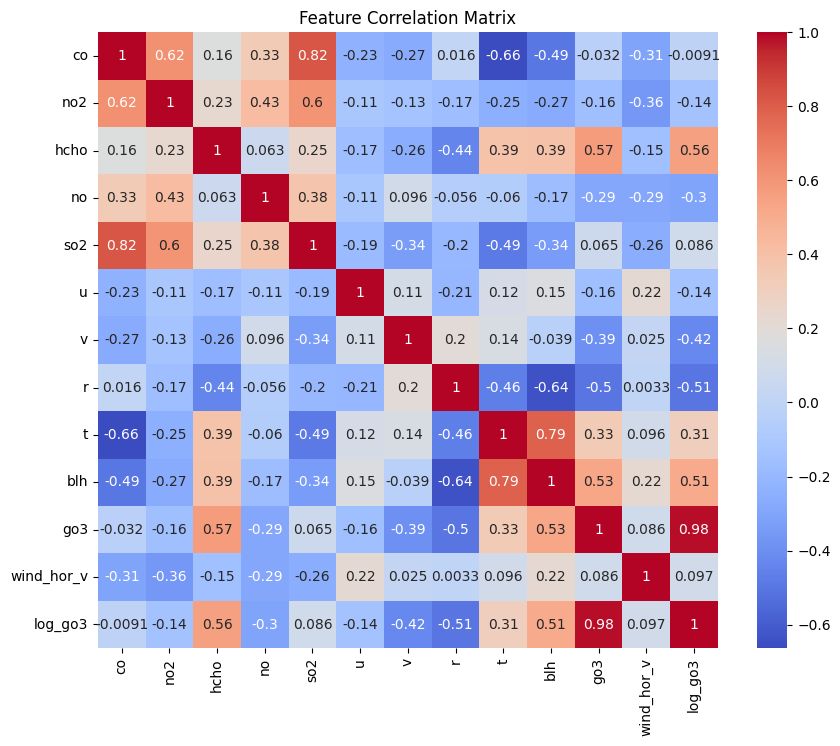

In [ ]:
#Vizualisation of correlation of features

import seaborn as sns

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df4.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
df4 = df4.drop(['u','v'],axis = 1) # Dropping u and v as we can see that wind_hor_v is of more importance than u and v

In [ ]:
df4

,co,no2,hcho,no,so2,r,t,blh,go3,wind_hor_v,log_go3
0,7.402500e-07,5.191000e-09,2.226250e-09,1.748125e-10,3.970000e-09,71.264304,286.796873,430.097927,5.496250e-08,1.956869,-16.716615
1,9.008750e-07,6.485625e-09,2.913750e-09,3.588125e-10,6.491250e-09,75.071473,286.960452,269.409405,6.398750e-08,0.631223,-16.564578
2,7.522500e-07,5.176250e-09,2.098750e-09,1.651625e-10,5.178750e-09,74.068304,286.112428,359.103796,6.223750e-08,2.995023,-16.592308
3,8.117500e-07,5.164875e-09,2.182500e-09,3.451375e-10,4.932500e-09,74.035942,285.816466,252.040761,6.532500e-08,1.055802,-16.543891
4,8.548750e-07,5.434250e-09,2.341250e-09,7.319875e-10,3.966250e-09,81.577966,284.944824,193.752882,6.977500e-08,1.905510,-16.477990
...,...,...,...,...,...,...,...,...,...,...,...
5473,1.259500e-06,2.227750e-08,3.448750e-09,4.469750e-09,1.376500e-08,62.117762,292.366456,240.524968,3.968100e-08,0.750260,-17.042393
5474,1.677250e-06,2.816250e-08,4.176250e-09,2.679250e-09,1.659125e-08,65.571665,292.101044,227.906880,4.797500e-08,0.531615,-16.852586
5475,1.814250e-06,2.589750e-08,4.217500e-09,1.503388e-09,1.231750e-08,69.292657,291.957276,238.063698,6.167000e-08,1.608890,-16.601468
5476,1.846250e-06,1.799250e-08,4.082500e-09,1.343200e-09,9.324000e-09,75.312341,291.198365,215.496743,5.252750e-08,0.834061,-16.761929


In [ ]:
# df4['go3'] = df4['log_go3']   # go3 me log_go3 ki values copy kardi hain
# df4 = df4.drop(['log_go3'],axis=1)   #log_go3 ko drop kardiya
# df4


In [ ]:

df4 = df4.drop(['go3'],axis=1)   #go3 ko drop kardiya
df4


,co,no2,hcho,no,so2,r,t,blh,wind_hor_v,log_go3
0,7.402500e-07,5.191000e-09,2.226250e-09,1.748125e-10,3.970000e-09,71.264304,286.796873,430.097927,1.956869,-16.716615
1,9.008750e-07,6.485625e-09,2.913750e-09,3.588125e-10,6.491250e-09,75.071473,286.960452,269.409405,0.631223,-16.564578
2,7.522500e-07,5.176250e-09,2.098750e-09,1.651625e-10,5.178750e-09,74.068304,286.112428,359.103796,2.995023,-16.592308
3,8.117500e-07,5.164875e-09,2.182500e-09,3.451375e-10,4.932500e-09,74.035942,285.816466,252.040761,1.055802,-16.543891
4,8.548750e-07,5.434250e-09,2.341250e-09,7.319875e-10,3.966250e-09,81.577966,284.944824,193.752882,1.905510,-16.477990
...,...,...,...,...,...,...,...,...,...,...
5473,1.259500e-06,2.227750e-08,3.448750e-09,4.469750e-09,1.376500e-08,62.117762,292.366456,240.524968,0.750260,-17.042393
5474,1.677250e-06,2.816250e-08,4.176250e-09,2.679250e-09,1.659125e-08,65.571665,292.101044,227.906880,0.531615,-16.852586
5475,1.814250e-06,2.589750e-08,4.217500e-09,1.503388e-09,1.231750e-08,69.292657,291.957276,238.063698,1.608890,-16.601468
5476,1.846250e-06,1.799250e-08,4.082500e-09,1.343200e-09,9.324000e-09,75.312341,291.198365,215.496743,0.834061,-16.761929


Data Preprocessing End

*** Random Forest Model ***

Scaling / Normalization of features and getting the scaled dataframe

In [ ]:
from sklearn.model_selection import train_test_split

# Scaling or Normalising of features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # or use MinMaxScaler() if preferred

#X = df3.drop('go3', axis=1)
X = df4.drop('log_go3', axis=1)
X_scaled = scaler.fit_transform(X) # Scaling of features is done so that all features are normalised , so that while calculating feature importance no problem occurs.
# Convert the scaled array back to a DataFrame with the original column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


#y = df3['go3']  #Target variable
y = df4['log_go3']  #Target variable

# If you want to add back the target variable 'go3' to this scaled DataFrame
#df_scaled = pd.concat([X_scaled_df, df3['go3']], axis=1)
df_scaled = pd.concat([X_scaled_df, df4['log_go3']], axis=1)

In [ ]:
df_scaled

,co,no2,hcho,no,so2,r,t,blh,wind_hor_v,log_go3
0,0.532380,-1.322562,-1.041610,-0.636225,-0.791249,0.714175,-2.262562,-0.446778,-0.130696,-16.716615
1,0.997090,-1.099384,-0.353417,-0.540149,-0.158544,0.905299,-2.236651,-0.946553,-1.421632,-16.564578
2,0.567098,-1.325104,-1.169239,-0.641264,-0.487915,0.854939,-2.370981,-0.667584,0.880277,-16.592308
3,0.739239,-1.327065,-1.085404,-0.547289,-0.549711,0.853315,-2.417863,-1.000573,-1.008170,-16.543891
4,0.864006,-1.280628,-0.926494,-0.345293,-0.792190,1.231933,-2.555935,-1.181860,-0.180709,-16.477990
...,...,...,...,...,...,...,...,...,...,...
5473,2.034640,1.622937,0.182122,1.606402,1.666796,0.255008,-1.380316,-1.036389,-1.305711,-17.042393
5474,3.243247,2.637437,0.910355,0.671482,2.376041,0.428398,-1.422359,-1.075634,-1.518632,-16.852586
5475,3.639606,2.246979,0.951646,0.057498,1.303548,0.615196,-1.445132,-1.044044,-0.469563,-16.601468
5476,3.732187,0.884256,0.816510,-0.026145,0.552332,0.917391,-1.565347,-1.114232,-1.224105,-16.761929


In [ ]:
X = df_scaled.drop('log_go3', axis=1)

y = df_scaled['log_go3']  #Target variable


Now, Splitting of data into testing and training data and making the model learn.

In [ ]:
#Data Splitting in train:test = 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor  #Random forest Regressor is used because O3 has continous numerical values and not labels pr categories else RandomeForestClassifier would have been used.

#Training the random forest regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_log_pred = rf.predict(X_test)


In [ ]:
y_log_pred

array([-16.60711782, -16.77964122, -16.53330105, ..., -16.84116345,
       -16.54158681, -16.47134926])

In [ ]:
type(y_log_pred)

numpy.ndarray

In [ ]:
y_log_pred.shape  #1096 because 5478 is total rows and 20% of it is 1095.6 ~ 1096

(1644,)

In [ ]:
print(len(y_log_pred)) #len function works as it is array type

1644


In [ ]:
y_log_pred_df = pd.DataFrame(y_log_pred) # Here we convertef the y_pred array into a dataframe containing single column for our convinience

In [ ]:
type(y_log_pred_df)

pandas.core.frame.DataFrame

In [ ]:
y_log_pred_df.shape

(1644, 1)

Performace check of RF Model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Calculation of mean square error of predicted O3 level with actual
mse = mean_squared_error(y_test, y_log_pred)

#Calculation of r2 score of predicted O3 level with actual
r2 = r2_score(y_test, y_log_pred)

#Calculation of Mean Absolute Error of predicted O3 level with actual
mae = mean_absolute_error(y_test, y_log_pred)


In [ ]:
print("Mean Sqaure Error  : ", mse)
print("r2 score           : ", r2)
print("Mean Absolute Erro : ", mae)

Mean Sqaure Error  :  0.01493233395184982
r2 score           :  0.7620788132764784
Mean Absolute Erro :  0.09467637165392397


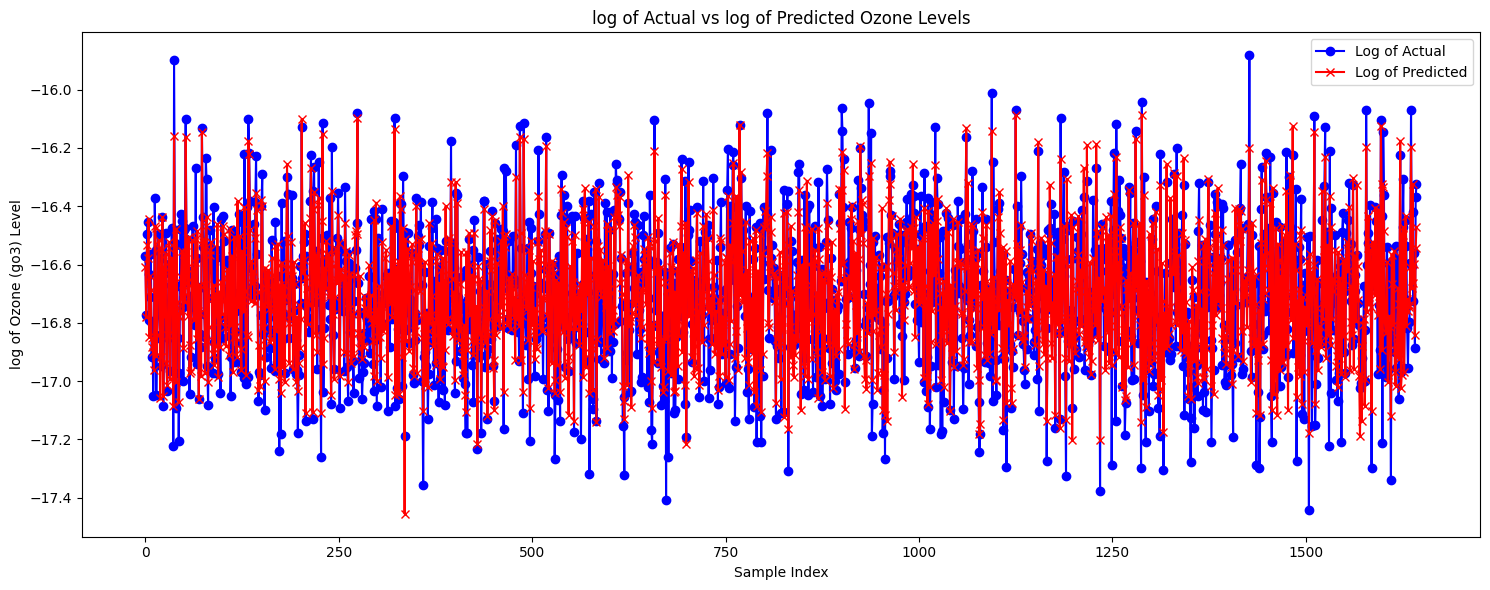

In [ ]:
# Visualising y_test (actual) vs y_log_pred (predicted)


#Setting the ratio of the figure
plt.figure(figsize=(15,6))

#Plotting actual values curve
plt.plot(y_test.values, label = "Log of Actual", marker = "o", color = "b")

#Plotting predicted values curve
plt.plot(y_log_pred_df.values, label = "Log of Predicted", marker = "x", color = "r")

plt.xlabel('Sample Index')
plt.ylabel('log of Ozone (go3) Level')
plt.title('log of Actual vs log of Predicted Ozone Levels')

# Add a legend to distinguish between actual and predicted
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
#Calculation of mean square error of predicted O3 level with actual
mseActual = mean_squared_error(np.exp(y_test), np.exp(y_log_pred))

#Calculation of r2 score of predicted O3 level with actual
r2Actual = r2_score(np.exp(y_test), np.exp(y_log_pred))

#Calculation of Mean Absolute Error of predicted O3 level with actual  np.log(df4['go3'])
maeActual = mean_absolute_error(np.exp(y_test), np.exp(y_log_pred))

In [ ]:
print("Mean Sqaure Error  : ", mseActual)
print("r2 score           : ", r2Actual)
print("Mean Absolute Erro : ", maeActual)

Mean Sqaure Error  :  4.8861503350356453e-17
r2 score           :  0.772278907861941
Mean Absolute Erro :  5.3383308396391095e-09


In [ ]:
y_pred_df = pd.DataFrame(np.exp(y_log_pred)) # Here we converted the y_log_pred array into a dataframe containing single column of exponential of y_log_pred for our convinience

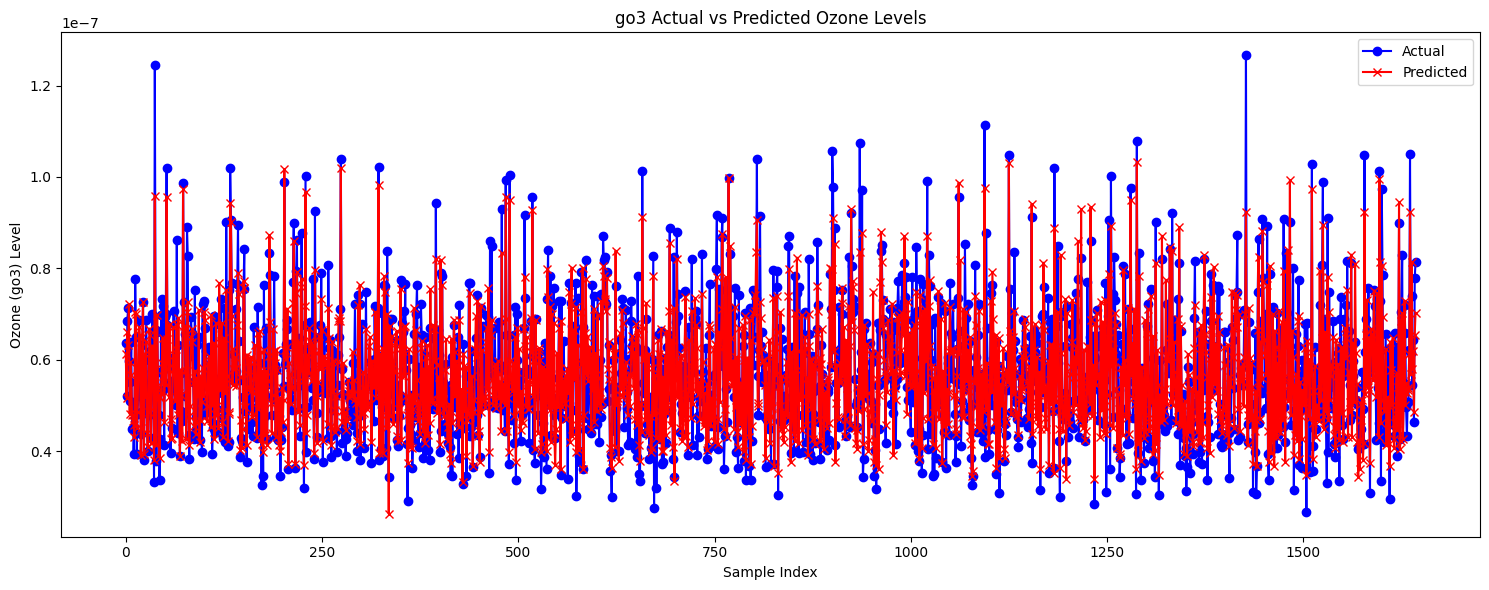

In [ ]:
# Visualising y_test (actual) vs y__pred (predicted)


#Setting the ratio of the figure
plt.figure(figsize=(15,6))

#Plotting actual values curve
plt.plot(np.exp(y_test).values, label = "Actual", marker = "o", color = "b")

#Plotting predicted values curve
plt.plot(y_pred_df.values, label = "Predicted", marker = "x", color = "r")

plt.xlabel('Sample Index')
plt.ylabel('Ozone (go3) Level')
plt.title('go3 Actual vs Predicted Ozone Levels')

# Add a legend to distinguish between actual and predicted
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

***Implementing Feature Importance Schemes***

---





*   Built-in Feature importance scheme of RF model i.e. Gini Importncae scheme



In [ ]:
#Getting feature importance
importances = rf.feature_importances_

#Creating a Dataframe for better vizualisation
feature_names = X_train.columns
feature_importances = pd.DataFrame({'Feature' : feature_names,'Importance' : importances})

#Sorting the features as per their importance
feature_importances = feature_importances.sort_values(by='Importance', ascending = False)

#Displaying the top features
feature_importances

,Feature,Importance
7,blh,0.313887
3,no,0.169948
2,hcho,0.155336
0,co,0.111547
4,so2,0.064094
5,r,0.061762
1,no2,0.055963
6,t,0.039982
8,wind_hor_v,0.027481


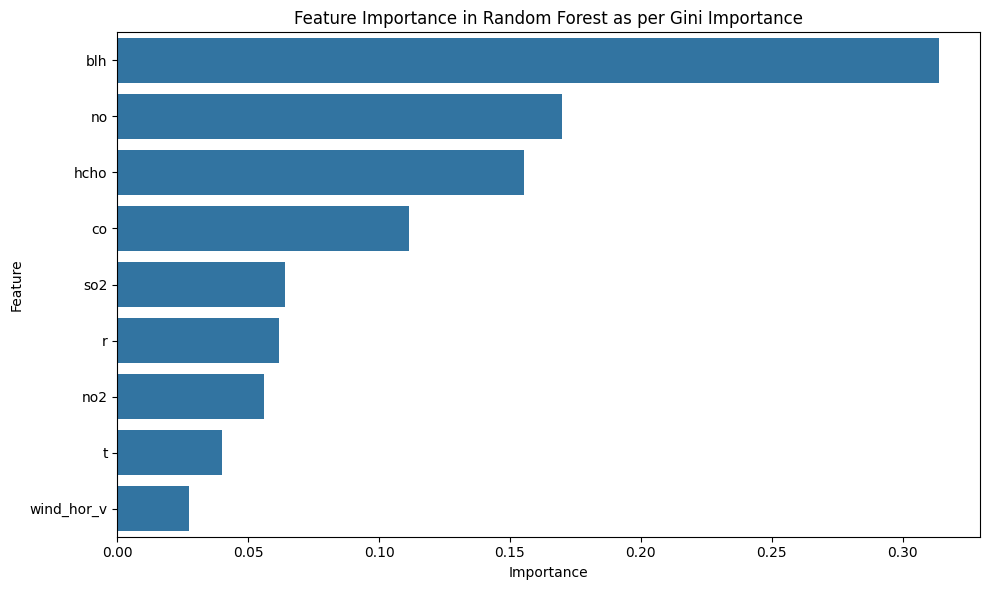

In [ ]:
#Visualizing feature vs importance

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance in Random Forest as per Gini Importance')
plt.tight_layout()
plt.show()



*   Permutation based importance scheme



In [ ]:
from sklearn.inspection import permutation_importance

# #Calculating feature importance on test data
# result = permutation_importance(rf,X_test, y_test, n_repeats = 10, random_state = 42)

# #Getting thr sorted features on the basis of their importance
# sorted_idx = result.importances_mean.argsort()

# # Plot the results
# plt.figure(figsize=(10, 6))
# plt.barh(X_test.columns[sorted_idx], result.importances_mean[sorted_idx])
# plt.xlabel('Permutation Importance')
# plt.title('Permutation-Based Feature Importance')
# plt.show()

In [ ]:
# Perform Permutation Importance
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Display the importance results
importance_scores = result.importances_mean
feature_names = X_test.columns

# Print sorted feature importances
print("Permutation-Based Feature Importances:")
for i in importance_scores.argsort()[::-1]:  # Sort in descending order
    print(f"{feature_names[i]}: {importance_scores[i]:.4f}")

Permutation-Based Feature Importances:
no: 0.3736
co: 0.3178
hcho: 0.2608
blh: 0.2508
so2: 0.0928
no2: 0.0879
r: 0.0467
t: 0.0317
wind_hor_v: 0.0065


In [ ]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance on the test set
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)  #One more optional parameter can be added i.e. scoring='accuracy'

# result.importances_mean gives the mean importance for each feature
# result.importances_std gives the standard deviation of importance

# Create a DataFrame for better visualization
feature_importances_perm = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result.importances_mean,
    'Std Dev': result.importances_std
})

# Sort by importance
feature_importances_perm = feature_importances_perm.sort_values(by='Importance', ascending=False)

# Display the results
print(feature_importances_perm)


      Feature  Importance   Std Dev
3          no    0.373590  0.017869
0          co    0.317834  0.012712
2        hcho    0.260763  0.011993
7         blh    0.250838  0.007451
4         so2    0.092802  0.006623
1         no2    0.087904  0.006680
5           r    0.046670  0.001807
6           t    0.031684  0.003556
8  wind_hor_v    0.006469  0.001400


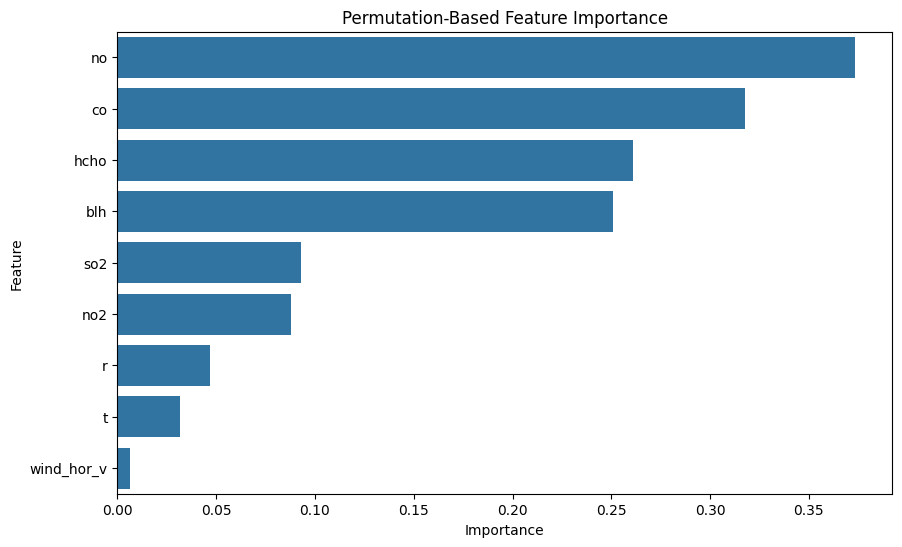

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot permutation-based feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_perm)
plt.title('Permutation-Based Feature Importance')
plt.show()


In [ ]:
# Set a threshold for feature importance (e.g., importance > 0.01)
threshold = 0.001
important_features_perm = feature_importances_perm[feature_importances_perm['Importance'] > threshold]['Feature']

# Filter the data based on important features
X_train_filtered = X_train[important_features_perm]
X_test_filtered = X_test[important_features_perm]

# Train a new model with filtered features
rf_filtered = RandomForestRegressor(n_estimators=100, random_state=42)
rf_filtered.fit(X_train_filtered, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Predict and evaluate
y_pred_filtered = rf_filtered.predict(X_test_filtered)

In [ ]:
#Calculation mean square error of predicted O3 level with actual
mse_filtered = mean_squared_error(y_test, y_pred_filtered)

#Calculation r2 score of predicted O3 level with actual
r2_filtered = r2_score(y_test, y_pred_filtered)

In [ ]:
print("Mean Sqaure Error : ", mse_filtered)
print("r2 score : ", r2_filtered)

Mean Sqaure Error :  0.014959391304132756
r2 score :  0.761647700673083




*   Mean Decrease Accuracy Feature Importance scheme



In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np

# Perform permutation importance on the trained model
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Get feature importances
importance_scores = result.importances_mean

# Get the feature names
feature_names = X_test.columns

# Sort features by importance
indices = np.argsort(importance_scores)[::-1]  # Sort in descending order

# Print the feature importance scores
print("Feature Importances (Mean Decrease Accuracy):")
for i in indices:
    print(f"{feature_names[i]}: {importance_scores[i]:.4f}")


Feature Importances (Mean Decrease Accuracy):
no: 0.3736
co: 0.3178
hcho: 0.2608
blh: 0.2508
so2: 0.0928
no2: 0.0879
r: 0.0467
t: 0.0317
wind_hor_v: 0.0065


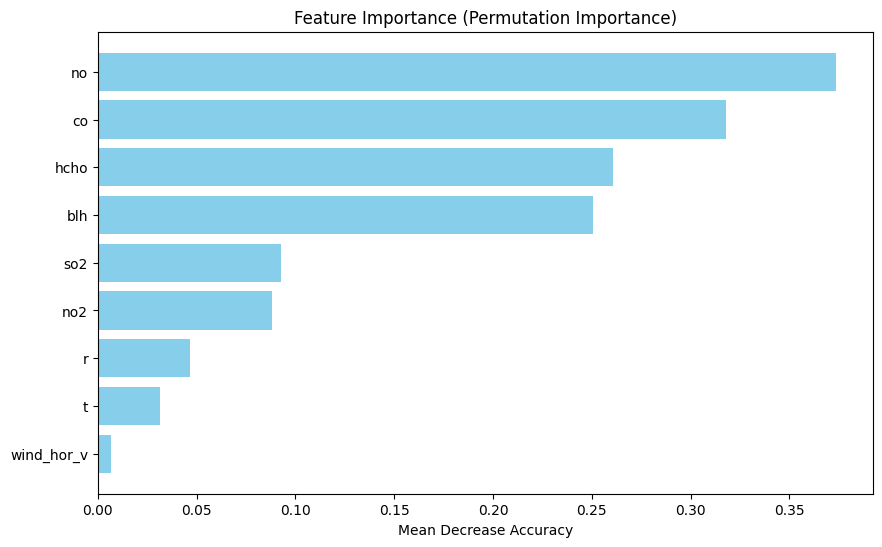

In [ ]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names[indices], importance_scores[indices], color='skyblue')
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance (Permutation Importance)')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()




*   SHAP importance scheme



In [ ]:
!pip install shap


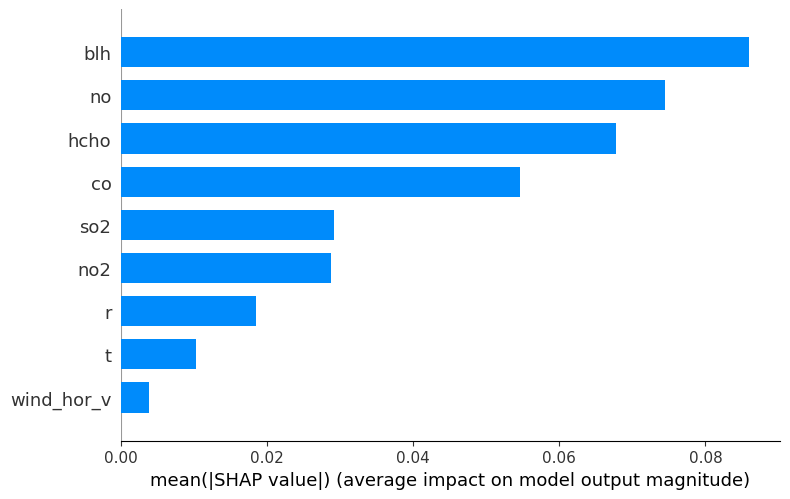

In [ ]:
import shap

# Create a SHAP explainer for your RandomForestRegressor model
explainer = shap.TreeExplainer(rf)

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test)

# Plot summary of feature importance based on SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [ ]:
# Plot SHAP values for a single sample (e.g., the first sample in the test set)
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])


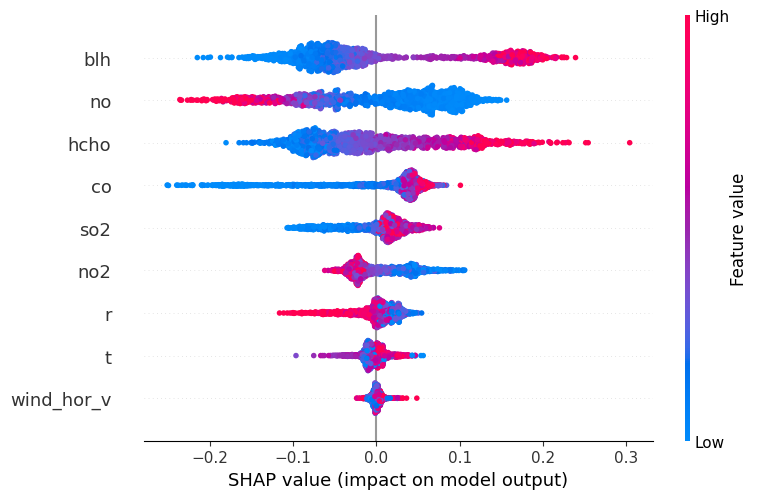

In [ ]:
shap.summary_plot(shap_values, X_test)


In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=1000,learning_rate=0.01, random_state=42,max_depth=10)
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predict and evaluate
y_log_pred_xgb = xgb.predict(X_test)

In [ ]:
y_log_pred_xgb.shape

(1644,)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
r2_rgb = r2_score(y_test, y_log_pred_xgb)
print("r2_score",r2_rgb)

r2_score 0.7622518883561351
